In [ ]:
import pandas as pd

df_test=pd.read_csv("C:/Users/Anderson/Downloads/UNSW-NB15 - CSV Files/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv")
df_test=df_test.drop(['id'], axis=1)
df_train=pd.read_csv("C:/Users/Anderson/Downloads/UNSW-NB15 - CSV Files/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set.csv")
df_train=df_train.drop(['id'], axis=1)

df=pd.concat([df_train,df_test])

df.shape

import seaborn as s
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(4,8))
ax=s.countplot(x='label',data=df )
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

df=df.drop(['attack_cat'], axis=1)

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

df_categorical_values_enc=df.select_dtypes(include=['object']).apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# proto
proto=sorted(df.proto.unique())
string1 = 'Proto_'
proto_2=[string1 + x for x in proto]
# service
service=sorted(df.service.unique())
string2 = 'service_'
service_2=[string2 + x for x in service]
# state
state=sorted(df.state.unique())
string3 = 'state_'
state_2=[string3 + x for x in state]
# put together
dumcols=[]
#dumcols=''.join(proto_2 + service_2 + state_2)
dumcols.append(proto_2)
dumcols.append(service_2)
dumcols.append(state_2)
print(dumcols)

def flatten(l):
    try:
        return flatten(l[0]) + (flatten(l[1:]) if len(l) > 1 else []) if type(l) is list else [l]
    except IndexError:
        return []

dumcols=flatten(dumcols)
print(dumcols)
len(dumcols)

enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
df_cat_data.head()

newdf=df.join(df_cat_data)
newdf.drop('state', axis=1, inplace=True)
newdf.drop('proto', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
print(newdf.shape)

newdf.head()





X=newdf.drop(['label'], axis=1)
y=newdf.label



   proto  service  state
0    113        0      4
1    113        0      4
2    113        0      4
3    113        3      4
4    113        0      4
[['Proto_3pc', 'Proto_a/n', 'Proto_aes-sp3-d', 'Proto_any', 'Proto_argus', 'Proto_aris', 'Proto_arp', 'Proto_ax.25', 'Proto_bbn-rcc', 'Proto_bna', 'Proto_br-sat-mon', 'Proto_cbt', 'Proto_cftp', 'Proto_chaos', 'Proto_compaq-peer', 'Proto_cphb', 'Proto_cpnx', 'Proto_crtp', 'Proto_crudp', 'Proto_dcn', 'Proto_ddp', 'Proto_ddx', 'Proto_dgp', 'Proto_egp', 'Proto_eigrp', 'Proto_emcon', 'Proto_encap', 'Proto_etherip', 'Proto_fc', 'Proto_fire', 'Proto_ggp', 'Proto_gmtp', 'Proto_gre', 'Proto_hmp', 'Proto_i-nlsp', 'Proto_iatp', 'Proto_ib', 'Proto_icmp', 'Proto_idpr', 'Proto_idpr-cmtp', 'Proto_idrp', 'Proto_ifmp', 'Proto_igmp', 'Proto_igp', 'Proto_il', 'Proto_ip', 'Proto_ipcomp', 'Proto_ipcv', 'Proto_ipip', 'Proto_iplt', 'Proto_ipnip', 'Proto_ippc', 'Proto_ipv6', 'Proto_ipv6-frag', 'Proto_ipv6-no', 'Proto_ipv6-opts', 'Proto_ipv6-route', 'Proto_ipx-n-

In [2]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0,
                           warm_start=False, class_weight=None)

Automatically created module for IPython interactive environment


In [3]:
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=clf, step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)
# Plot number of features VS. cross-validation scores


RFECV(cv=10,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

Text(0.5,1,'RFECV')

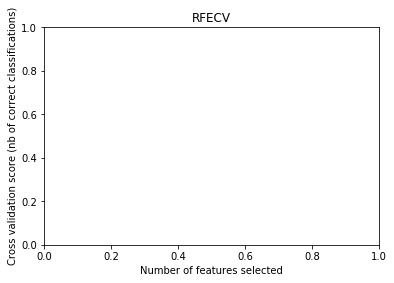

In [4]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV')

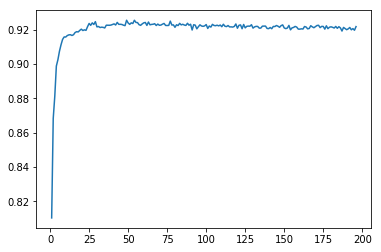

In [5]:
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()